In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Importing Dataset

src: https://www.kaggle.com/datasets/saurabhbadole/leading-indian-bank-and-cibil-real-world-dataset/data


In [ ]:
df=pd.read_csv('/content/final_dataset.csv', encoding='utf-8')

print("Shape")
df.shape

print("----")

print("Info")
df.info()

Shape
----
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51337 entries, 0 to 51336
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PROSPECTID                 51336 non-null  float64
 1   time_since_recent_payment  51337 non-null  int64  
 2   num_times_delinquent       51337 non-null  int64  
 3   max_recent_level_of_deliq  51337 non-null  int64  
 4   num_std                    51337 non-null  int64  
 5   num_sub                    51337 non-null  int64  
 6   num_dbt                    51337 non-null  int64  
 7   num_lss                    51337 non-null  int64  
 8   recent_level_of_deliq      51337 non-null  int64  
 9   tot_enq                    51337 non-null  int64  
 10  CC_enq                     51337 non-null  int64  
 11  PL_enq                     51337 non-null  int64  
 12  time_since_recent_enq      51337 non-null  int64  
 13  MARITALSTATUS              513

In [ ]:
#Remove prospect id column as it really wont show much relavance

df = df.drop(columns=['PROSPECTID'], errors='ignore')

In [ ]:
df.replace(-99999, np.nan, inplace=True)  # Replace -99999 with NaN
df.dropna(inplace=True)
df.shape
df

,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_std,num_sub,num_dbt,num_lss,recent_level_of_deliq,tot_enq,CC_enq,...,pct_of_active_TLs_ever,pct_currentBal_all_TL,CC_Flag,PL_Flag,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,549.0,11,29,21,0,0,0,29,6.0,0.0,...,0.200,0.798,0,1,1,0,PL,PL,696,P2
1,47.0,0,0,0,0,0,0,0,1.0,0.0,...,1.000,0.370,0,0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,302.0,9,25,10,0,0,0,25,4.0,0.0,...,1.000,0.585,0,0,1,0,ConsumerLoan,others,693,P2
4,583.0,0,0,53,0,0,0,0,1.0,0.0,...,0.333,0.000,0,0,0,0,AL,AL,753,P1
5,245.0,14,270,5,3,0,0,26,15.0,2.0,...,0.167,0.000,0,0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,2,24,0,0,0,0,24,4.0,0.0,...,1.000,0.230,0,0,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,57.0,0,0,6,0,0,0,0,2.0,0.0,...,0.500,0.660,0,0,0,0,others,others,702,P1
51333,32.0,0,0,0,0,0,0,0,6.0,0.0,...,0.500,0.428,0,0,0,0,ConsumerLoan,others,661,P3
51334,58.0,0,0,0,0,0,0,0,3.0,0.0,...,0.500,0.143,0,0,0,0,ConsumerLoan,others,686,P2


In [ ]:
!pip install pgmpy
!pip install bamt

In [ ]:
print("Unique values in 'Approved_Flag' before mapping:", df['Approved_Flag'].unique())

Unique values in 'Approved_Flag' before mapping: ['P2' 'P1' 'P3' 'P4']


In [ ]:
after_df = df.copy() # df to be used later

In [ ]:
# Custom priority mapping for 'Approved_Flag' before normalization
# priority_mapping = {
#     'P1': 1.0,       # Highest priority
#     'P2': 0.666667,
#     'P3': 0.333333,
#     'P4': 0.0        # Lowest priority
# }

priority_mapping = {
    'P1': 1,  # Highest priority
    'P2': 2,
    'P3': 3,
    'P4': 4   # Lowest priority
}

# update: converting this to discrete values to maintain order


df['Approved_Flag'] = df['Approved_Flag'].map(priority_mapping)

# Encode the other categorical columns as numerical codes
categorical_columns = df.select_dtypes(include=['object', 'string']).columns
for col in categorical_columns:
    if col != 'Approved_Flag':
        df[col] = pd.Categorical(df[col]).codes


In [ ]:
after_df

,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_std,num_sub,num_dbt,num_lss,recent_level_of_deliq,tot_enq,CC_enq,...,pct_of_active_TLs_ever,pct_currentBal_all_TL,CC_Flag,PL_Flag,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,549.0,11,29,21,0,0,0,29,6.0,0.0,...,0.200,0.798,0,1,1,0,PL,PL,696,P2
1,47.0,0,0,0,0,0,0,0,1.0,0.0,...,1.000,0.370,0,0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,302.0,9,25,10,0,0,0,25,4.0,0.0,...,1.000,0.585,0,0,1,0,ConsumerLoan,others,693,P2
4,583.0,0,0,53,0,0,0,0,1.0,0.0,...,0.333,0.000,0,0,0,0,AL,AL,753,P1
5,245.0,14,270,5,3,0,0,26,15.0,2.0,...,0.167,0.000,0,0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,2,24,0,0,0,0,24,4.0,0.0,...,1.000,0.230,0,0,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,57.0,0,0,6,0,0,0,0,2.0,0.0,...,0.500,0.660,0,0,0,0,others,others,702,P1
51333,32.0,0,0,0,0,0,0,0,6.0,0.0,...,0.500,0.428,0,0,0,0,ConsumerLoan,others,661,P3
51334,58.0,0,0,0,0,0,0,0,3.0,0.0,...,0.500,0.143,0,0,0,0,ConsumerLoan,others,686,P2


## Normalize the data

```
Ai = (Ai)-mean/standard deviation
```




In [ ]:
# Normalize the DataFrame (only numerical columns will be scaled)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Print the normalized DataFrame
print("Normalized DataFrame:")
print(df_normalized.head())

Normalized DataFrame:
   time_since_recent_payment  num_times_delinquent  max_recent_level_of_deliq  \
0                   0.090219              0.148649                   0.032222   
1                   0.007422              0.000000                   0.000000   
2                   0.049480              0.121622                   0.027778   
3                   0.095827              0.000000                   0.000000   
4                   0.040079              0.189189                   0.300000   

    num_std   num_sub  num_dbt  num_lss  recent_level_of_deliq   tot_enq  \
0  0.049763  0.000000      0.0      0.0               0.032222  0.028571   
1  0.000000  0.000000      0.0      0.0               0.000000  0.000000   
2  0.023697  0.000000      0.0      0.0               0.027778  0.017143   
3  0.125592  0.000000      0.0      0.0               0.000000  0.000000   
4  0.011848  0.073171      0.0      0.0               0.028889  0.080000   

     CC_enq  ...  pct_of_active_TL

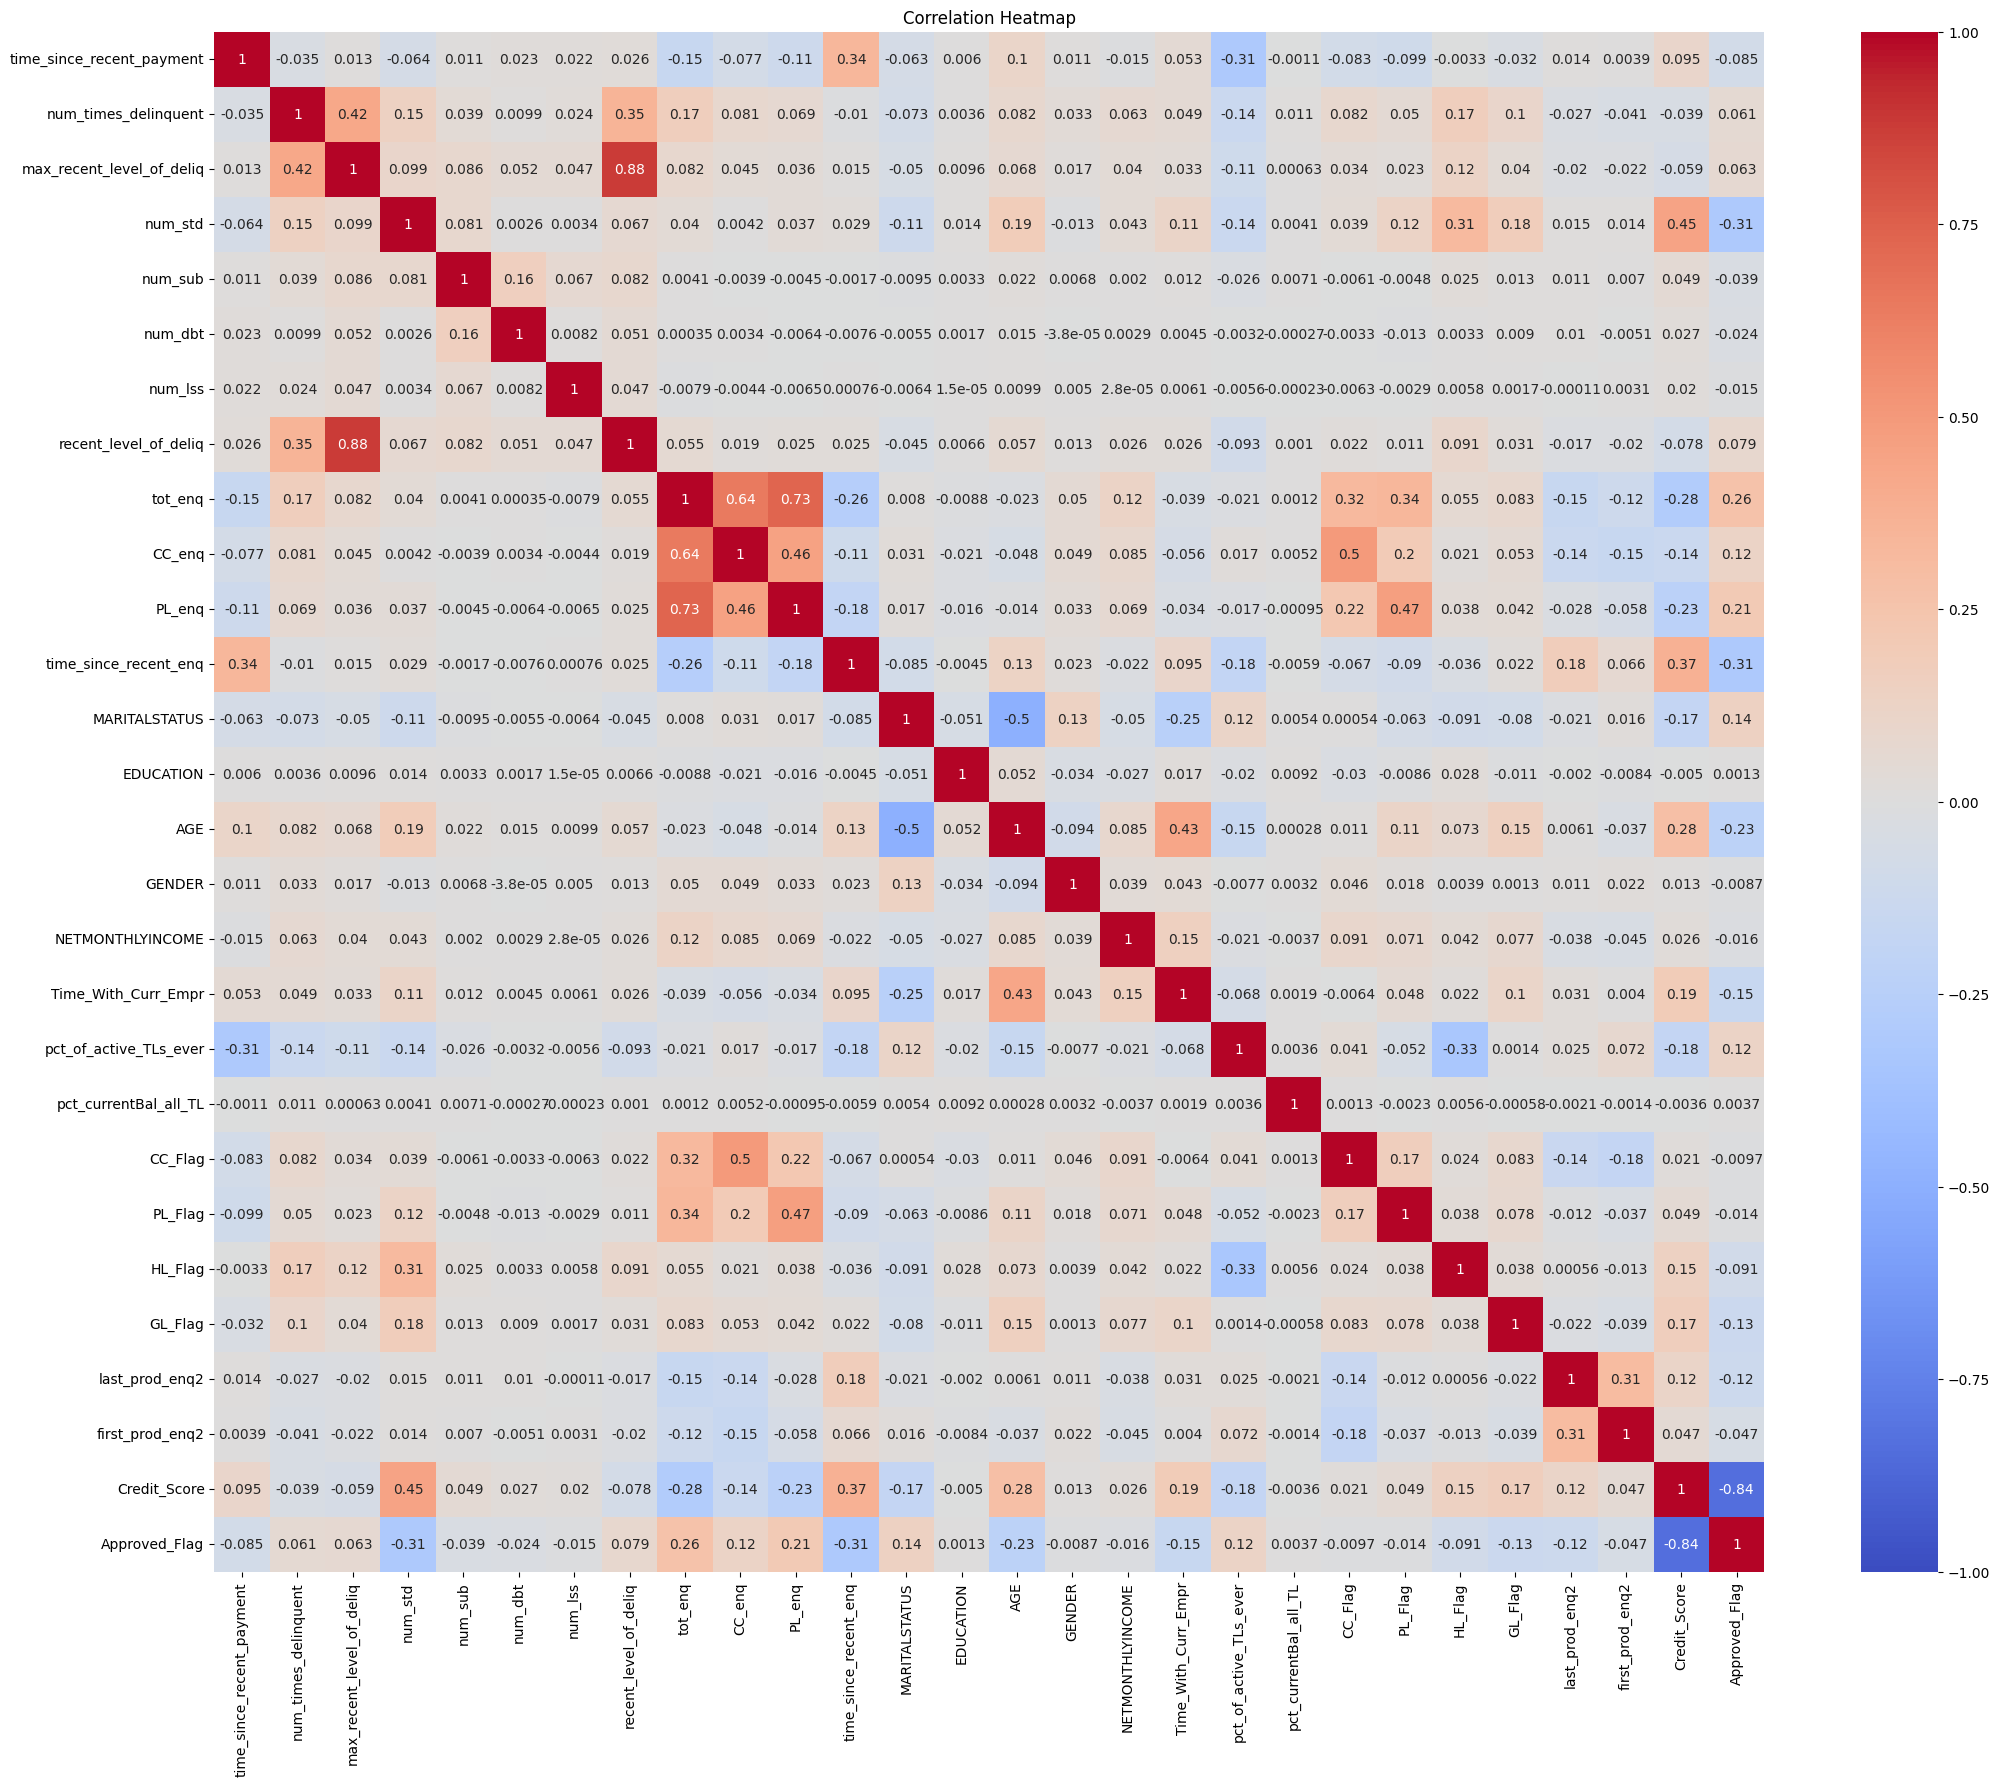

In [ ]:
plt.figure(figsize=(25, 20))
sns.heatmap(df_normalized.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

# Discretizing the data

In [ ]:
columns_to_process = [
    'time_since_recent_payment',
    'num_times_delinquent',
    'max_recent_level_of_deliq',
    'num_std',
    'num_sub',
    'num_dbt',
    'num_lss',
    'recent_level_of_deliq',
    'tot_enq',
    'CC_enq',
    'PL_enq',
    'time_since_recent_enq',
    'AGE',
    'NETMONTHLYINCOME',
    'Time_With_Curr_Empr',
    'pct_of_active_TLs_ever',
    'pct_currentBal_all_TL',
    'Credit_Score'
]

for col in columns_to_process:
    quartiles, bins = pd.qcut(
        df[col],
        q=4,
        labels=False,  # This will return 0, 1, 2, 3 (instead of 1, 2, 3, 4)
        retbins=True,  # This returns the bin edges as well
        duplicates='drop'
    )

    # Assign quartiles back to the DataFrame
    df[col] = quartiles + 1  # Shift to 1, 2, 3, 4 instead of 0, 1, 2, 3

    # Display the counts of each quartile
    print(df[col].value_counts())

    print(f"\nColumn: {col}")
    for i in range(len(bins) - 1):
        print(f"Quartile {i + 1} (Value {i + 1}): Range [{bins[i]:.2f}, {bins[i + 1]:.2f})")

df

time_since_recent_payment
1    10939
3    10512
4    10488
2    10127
Name: count, dtype: int64

Column: time_since_recent_payment
Quartile 1 (Value 1): Range [2.00, 51.00)
Quartile 2 (Value 2): Range [51.00, 71.00)
Quartile 3 (Value 3): Range [71.00, 146.00)
Quartile 4 (Value 4): Range [146.00, 6065.00)
num_times_delinquent
1    32160
2     9906
Name: count, dtype: int64

Column: num_times_delinquent
Quartile 1 (Value 1): Range [0.00, 1.00)
Quartile 2 (Value 2): Range [1.00, 74.00)
max_recent_level_of_deliq
1    31578
2    10488
Name: count, dtype: int64

Column: max_recent_level_of_deliq
Quartile 1 (Value 1): Range [0.00, 15.00)
Quartile 2 (Value 2): Range [15.00, 900.00)
num_std
1    31726
2    10340
Name: count, dtype: int64

Column: num_std
Quartile 1 (Value 1): Range [0.00, 8.00)
Quartile 2 (Value 2): Range [8.00, 422.00)
num_sub
1    42066
Name: count, dtype: int64

Column: num_sub
Quartile 1 (Value 1): Range [0.00, 41.00)
num_dbt
1    42066
Name: count, dtype: int64

Column: nu

,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_std,num_sub,num_dbt,num_lss,recent_level_of_deliq,tot_enq,CC_enq,...,pct_of_active_TLs_ever,pct_currentBal_all_TL,CC_Flag,PL_Flag,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,4,2,2,2,1,1,1,2,3,1,...,1,3,0,1,1,0,4,4,4,2
1,1,1,1,1,1,1,1,1,1,1,...,3,2,0,0,0,0,2,2,3,2
2,4,2,2,2,1,1,1,2,3,1,...,3,2,0,0,1,0,2,5,4,2
4,4,1,1,2,1,1,1,1,1,1,...,2,1,0,0,0,0,0,0,4,1
5,4,2,2,1,1,1,1,2,4,1,...,1,1,0,0,1,0,2,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,1,2,2,1,1,1,1,2,3,1,...,3,2,0,0,0,0,2,2,1,4
51332,2,1,1,1,1,1,1,1,1,1,...,2,3,0,0,0,0,5,5,4,1
51333,1,1,1,1,1,1,1,1,3,1,...,2,2,0,0,0,0,2,5,1,3
51334,2,1,1,1,1,1,1,1,2,1,...,2,1,0,0,0,0,2,5,3,2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def prepare_data(df: pd.DataFrame, target_column: str,
                sample_size: int = 30000, n_bins: int = 5,
                random_state: int = 42) -> pd.DataFrame:
    """Prepare the data by sampling and discretizing continuous variables"""
    # Sample the data
    df_sample = df.sample(n=sample_size, random_state=random_state).reset_index(drop=True)
    df_sample[target_column] = df_sample[target_column].astype('int32')  # Ensures compatible type

    for column in df_sample.select_dtypes(include=['float', 'int']).columns:
        if column != target_column:
            df_sample[column] = pd.cut(df_sample[column], bins=n_bins, labels=False)
            df_sample[column] = df_sample[column].astype('int32')

    return df_sample


def split_data(data: pd.DataFrame, target_column: str,
               test_size: float = 0.2, random_state: int = 42):
    """Split data into train and test sets"""
    return train_test_split(
        data, test_size=test_size, random_state=random_state,
        stratify=data[target_column]
    )

In [ ]:
processed_data = prepare_data(df, target_column='Approved_Flag', sample_size=len(df))
processed_data = processed_data.astype({col: 'int32' for col in processed_data.select_dtypes(include=['int8']).columns})
print(processed_data.head())

unique_values = processed_data['Approved_Flag'].unique()
print("Unique values in 'Approved_Flag':", unique_values)


   time_since_recent_payment  num_times_delinquent  max_recent_level_of_deliq  \
0                          1                     0                          0   
1                          4                     0                          0   
2                          4                     0                          0   
3                          3                     0                          0   
4                          1                     0                          0   

   num_std  num_sub  num_dbt  num_lss  recent_level_of_deliq  tot_enq  CC_enq  \
0        0        2        2        2                      0        0       2   
1        4        2        2        2                      0        0       2   
2        4        2        2        2                      0        0       2   
3        0        2        2        2                      0        3       2   
4        0        2        2        2                      0        4       2   

   ...  pct_of_active_TLs_

Big Brave (BIC)

In [ ]:
from bamt.networks.big_brave_bn import BigBraveBN

In [ ]:
space_restrictor = BigBraveBN()

space_restrictor.set_possible_edges_by_brave(
  df = processed_data)

ps = space_restrictor.possible_edges

In [ ]:
from sklearn import preprocessing
import bamt.preprocessors as pp

encoder = preprocessing.LabelEncoder()
discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

p = pp.Preprocessor([('encoder', encoder), ('discretizer', discretizer)])
discretized_data, est = p.apply(processed_data)

info = p.info

2024-11-07 13:46:24,218 | INFO     | preprocessors.py-scan-0099 | No one column is continuous


In [ ]:
import bamt.networks as networks
from pgmpy.estimators import K2Score, BicScore
from time import time

start_time_bigbrave = time()
bn = networks.DiscreteBN()

bn.add_nodes(descriptor=info)

params = {'white_list': ps}

bn.add_edges(discretized_data, scoring_function=('BIC',BicScore), params=params)

end_time_bigbrave = time()-start_time_bigbrave
end_time_bigbrave
exec_bigBraveBIC = end_time_bigbrave

ITERATION:  0
Improved Arc Addition:  (0, 1)
Delta Score:  964862709.3286749
Improved Arc Addition:  (0, 8)
Delta Score:  1696498945.33655
Improved Arc Addition:  (0, 11)
Delta Score:  1830807665.5569499
Improved Arc Addition:  (0, 24)
Delta Score:  2445299800.397625
Improved Arc Addition:  (1, 24)
Delta Score:  2446328592.971875
Improved Arc Addition:  (14, 13)
Delta Score:  2805897750.751363
ADDING:  (14, 13) 

ITERATION:  1
Improved Arc Addition:  (0, 1)
Delta Score:  964862709.3286749
Improved Arc Addition:  (0, 8)
Delta Score:  1696498945.33655
Improved Arc Addition:  (0, 11)
Delta Score:  1830807665.5569499
Improved Arc Addition:  (0, 24)
Delta Score:  2445299800.397625
Improved Arc Addition:  (1, 24)
Delta Score:  2446328592.971875
ADDING:  (1, 24) 

ITERATION:  2
Improved Arc Addition:  (0, 1)
Delta Score:  964862709.3286749
Improved Arc Addition:  (0, 8)
Delta Score:  1696498945.33655
Improved Arc Addition:  (0, 11)
Delta Score:  1830807665.5569499
Improved Arc Addition:  (0, 

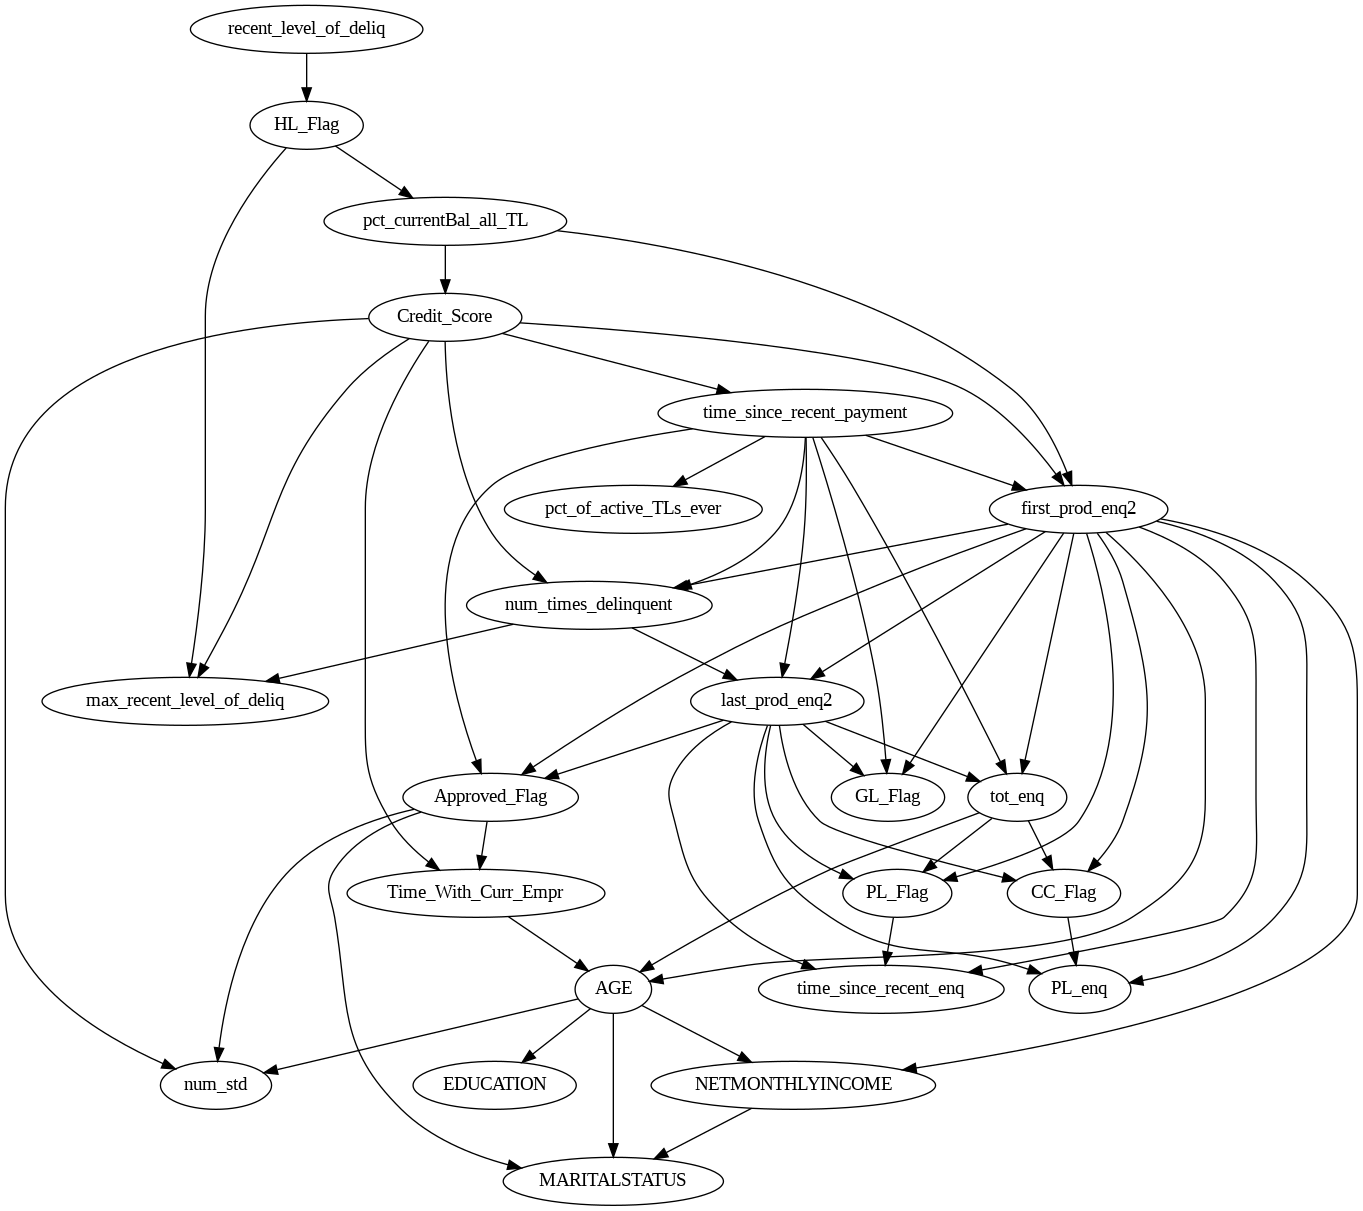

In [ ]:

import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork
from IPython.display import Image

pgmpy_model = BayesianNetwork(bn.edges)
display(Image((nx.drawing.nx_pydot.to_pydot(pgmpy_model)).create_png()))

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BicScore

# Convert the bamt network to pgmpy BayesianNetwork format
# Ensure bn.edges contains your network edges
pgmpy_model = BayesianNetwork(bn.edges)

# Fit model parameters if needed, depending on your requirements for CPDs
# This is optional based on whether you need CPDs fitted to data or just structure scoring

# Compute the BIC score
bic_score = BicScore(processed_data)
final_bic_score = bic_score.score(pgmpy_model)

print(f"Final BIC score for the model: {final_bic_score}")

bic_bigBraveBIC = final_bic_score

Final BIC score for the model: -883980.9833572818


# GES

In [ ]:
from itertools import combinations

import networkx as nx
import numpy as np

from pgmpy import config
from pgmpy.base import DAG
from pgmpy.estimators import (
    AICScore,
    BDeuScore,
    BDsScore,
    BicScore,
    K2Score,
    ScoreCache,
    StructureEstimator,
    StructureScore,
)
from pgmpy.global_vars import logger

In [ ]:
class GES(StructureEstimator):

    def __init__(self, data, use_cache=True, **kwargs):
        self.use_cache = use_cache

        super(GES, self).__init__(data=data, **kwargs)

    def _legal_edge_additions(self, current_model):
        edges = []
        for u, v in combinations(current_model.nodes(), 2):
            if not (current_model.has_edge(u, v) or current_model.has_edge(v, u)):
                if not nx.has_path(current_model, v, u):
                    edges.append((u, v))
                if not nx.has_path(current_model, u, v):
                    edges.append((v, u))
        return edges

    def _legal_edge_flips(self, current_model):
        potential_flips = []
        edges = list(current_model.edges())
        for u, v in edges:
            current_model.remove_edge(u, v)
            if not nx.has_path(current_model, u, v):
                potential_flips.append((v, u))

            # Restore the edge to get to the original model
            current_model.add_edge(u, v)
        return potential_flips


    def estimate(self, scoring_method="bic", debug=False):

        # Step 0: Initial checks and setup for arguments
        supported_methods = {
            "k2": K2Score,
            "bdeu": BDeuScore,
            "bds": BDsScore,
            "bic": BicScore,
            "aic": AICScore,
        }
        if isinstance(scoring_method, str):
            if scoring_method.lower() in [
                "k2score",
                "bdeuscore",
                "bdsscore",
                "bicscore",
                "aicscore",
            ]:
                raise ValueError(
                    f"The scoring method names have been changed. Please refer the documentation."
                )
            elif scoring_method.lower() not in list(supported_methods.keys()):
                raise ValueError(
                    f"Unknown scoring method. Please refer documentation for a list of supported score metrics."
                )
        elif not isinstance(scoring_method, StructureScore):
            raise ValueError(
                "scoring_method should either be one of k2score, bdeuscore, bicscore, bdsscore, aicscore, or an instance of StructureScore"
            )

        if isinstance(scoring_method, str):
            score = supported_methods[scoring_method.lower()](data=self.data)
        else:
            score = scoring_method

        if self.use_cache:
            score_fn = ScoreCache(score, self.data).local_score
        else:
            score_fn = score.local_score

        # Step 1: Initialize an empty model.
        current_model = DAG()
        current_model.add_nodes_from(list(self.data.columns))

        # Step 2: Forward step: Iteratively add edges till score stops improving.
        while True:
            potential_edges = self._legal_edge_additions(current_model)
            score_deltas = np.zeros(len(potential_edges))
            for index, (u, v) in enumerate(potential_edges):
                current_parents = current_model.get_parents(v)
                score_delta = score_fn(v, current_parents + [u]) - score_fn(
                    v, current_parents
                )
                score_deltas[index] = score_delta

            if (len(potential_edges) == 0) or (np.all(score_deltas <= 0)):
                break

            edge_to_add = potential_edges[np.argmax(score_deltas)]
            current_model.add_edge(edge_to_add[0], edge_to_add[1])
            if debug:
                logger.info(
                    f"Adding edge {edge_to_add[0]} -> {edge_to_add[1]}. Improves score by: {score_deltas.max()}"
                )

        # Step 3: Backward Step: Iteratively remove edges till score stops improving.
        while True:
            potential_removals = list(current_model.edges())
            score_deltas = np.zeros(len(potential_removals))

            for index, (u, v) in enumerate(potential_removals):
                current_parents = current_model.get_parents(v)
                score_deltas[index] = score_fn(
                    v, [node for node in current_parents if node != u]
                ) - score_fn(v, current_parents)
            if (len(potential_removals) == 0) or (np.all(score_deltas <= 0)):
                break
            edge_to_remove = potential_removals[np.argmax(score_deltas)]
            current_model.remove_edge(edge_to_remove[0], edge_to_remove[1])
            if debug:
                logger.info(
                    f"Removing edge {edge_to_remove[0]} -> {edge_to_remove[1]}. Improves score by: {score_deltas.max()}"
                )

        # Step 4: Flip Edges: Iteratively try to flip edges till score stops improving.
        while True:
            potential_flips = self._legal_edge_flips(current_model)
            score_deltas = np.zeros(len(potential_flips))
            for index, (u, v) in enumerate(potential_flips):
                v_parents = current_model.get_parents(v)
                u_parents = current_model.get_parents(u)
                score_deltas[index] = (
                    score_fn(v, v_parents + [u]) - score_fn(v, v_parents)
                ) + (
                    score_fn(u, [node for node in u_parents if node != v])
                    - score_fn(u, u_parents)
                )

            if (len(potential_flips) == 0) or (np.all(score_deltas <= 0)):
                break
            edge_to_flip = potential_flips[np.argmax(score_deltas)]
            current_model.remove_edge(edge_to_flip[1], edge_to_flip[0])
            current_model.add_edge(edge_to_flip[0], edge_to_flip[1])
            if debug:
                logger.info(
                    f"Fliping edge {edge_to_flip[1]} -> {edge_to_flip[0]}. Improves score by: {score_deltas.max()}"
                )

        # Step 5: Return the model.
        return current_model


In [ ]:
import pandas as pd
from pgmpy.estimators import BicScore
import networkx as nx
import matplotlib.pyplot as plt
from time import time


start_time = time()

# Define BIC scoring method
bic = BicScore(df)

# Create the GES object
ges = GES(data=df)

# Estimate the DAG using GES
best_model_ges = ges.estimate(scoring_method=bic, debug=True)

bic_score_ges = bic.score(best_model_ges)

execution_time = time() - start_time

exec_GES = execution_time
print(f"BIC score for GES: {bic_score_ges}")
bic_GES = bic_score_ges
# Print the number of nodes and edges
print(f"Number of nodes: {len(best_model_ges.nodes())}")
print(f"Number of edges: {len(best_model_ges.edges())}")

BIC score for GES: -807914.9837129056
Number of nodes: 28
Number of edges: 62


PC Algo

(31549, 28) (10517, 28)
Original number of features: 28

Top features selected (including target):
                      feature  correlation  chi_square_pval  combined_score
26               Credit_Score     0.739603     0.000000e+00    7.396035e+09
11      time_since_recent_enq     0.415249     0.000000e+00    4.152486e+09
3                     num_std     0.298984     0.000000e+00    2.989840e+09
8                     tot_enq     0.272090     0.000000e+00    2.720897e+09
14                        AGE     0.218404     0.000000e+00    2.184041e+09
10                     PL_enq     0.186002     0.000000e+00    1.860022e+09
7       recent_level_of_deliq     0.176172    2.345827e-257    1.761723e+09
2   max_recent_level_of_deliq     0.159713    6.855232e-224    1.597125e+09
17        Time_With_Curr_Empr     0.150811    1.061976e-197    1.508106e+09
12              MARITALSTATUS     0.143634    7.412782e-172    1.436340e+09
1        num_times_delinquent     0.131726    2.384739e-162    1.

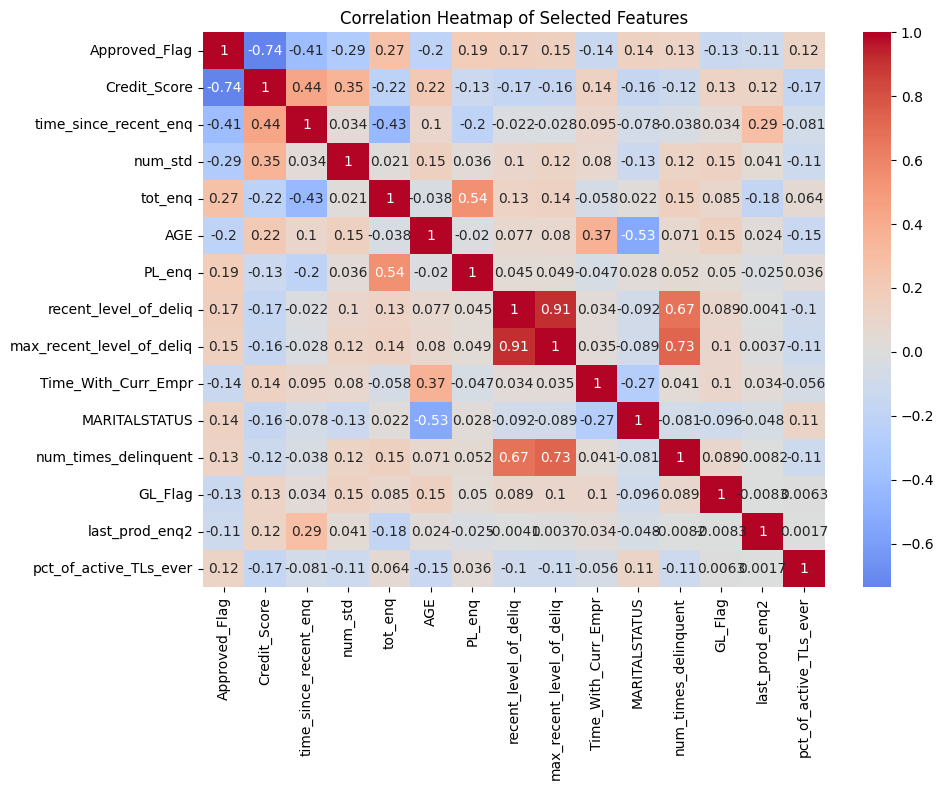


Starting PC algorithm...


  0%|          | 0/2 [00:00<?, ?it/s]


Time taken: 63.11 seconds
Number of edges found: 16


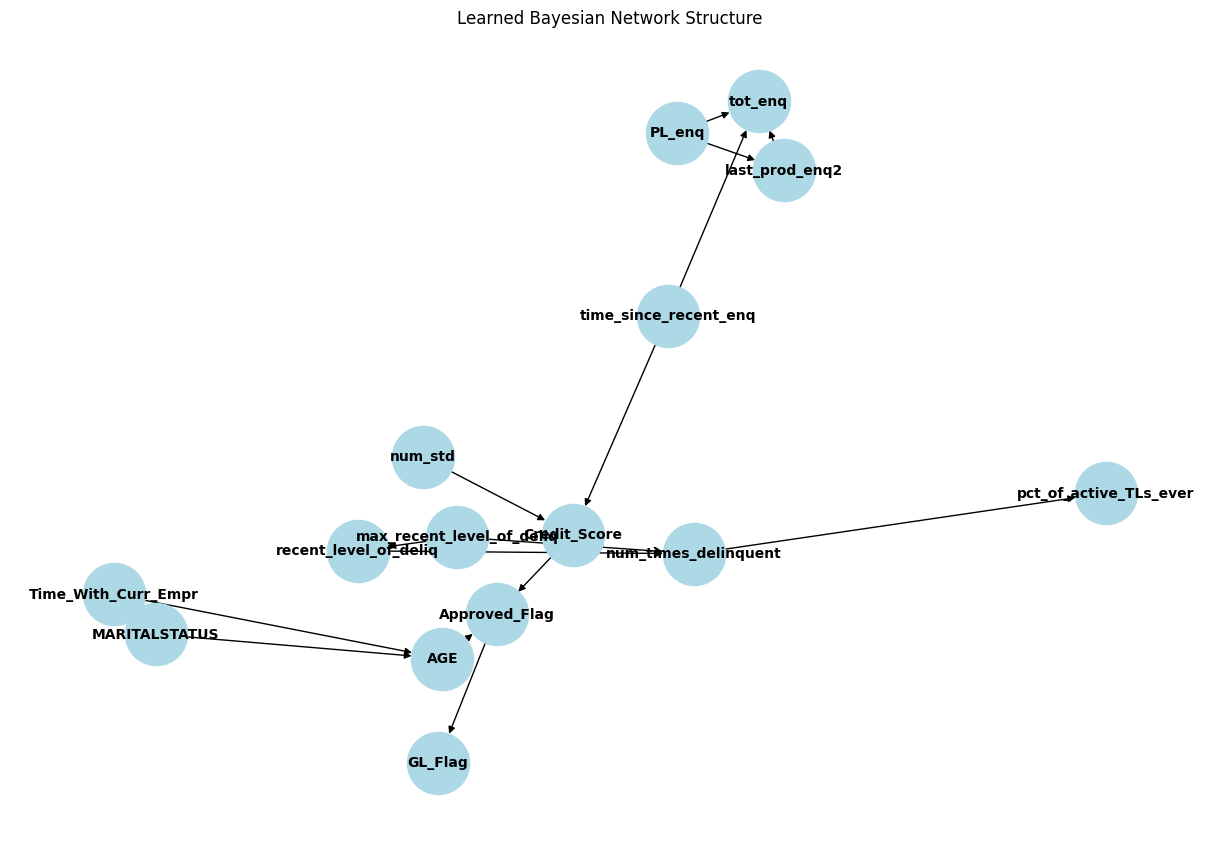

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.estimators import PC
import time
from scipy.stats import chi2_contingency
import seaborn as sns

train_data, test_data = split_data(processed_data, target_column='Approved_Flag', test_size=0.25)
print(train_data.shape, test_data.shape)
def select_relevant_features(data, target_col, correlation_threshold=0.05, max_features=15):
    """
    Select the most relevant features based on correlation and chi-square tests,
    ensuring target column is always included.
    """
    # Get correlation with target
    correlations = data.corr()[target_col].abs()

    # Calculate chi-square p-values for categorical variables
    chi_square_pvals = {}
    for col in data.columns:
        if col != target_col:
            contingency = pd.crosstab(data[col], data[target_col])
            chi2, p_val, _, _ = chi2_contingency(contingency)
            chi_square_pvals[col] = p_val

    # Combine correlation and chi-square results
    feature_importance = pd.DataFrame({
        'feature': correlations.index,
        'correlation': correlations.values,
        'chi_square_pval': [chi_square_pvals.get(col, 1.0) for col in correlations.index]
    })

    # Score features based on both metrics
    feature_importance['combined_score'] = (
        feature_importance['correlation'] / feature_importance['chi_square_pval'].clip(lower=1e-10)
    )

    # Remove target column from ranking
    feature_importance = feature_importance[feature_importance['feature'] != target_col]

    # Select top features (excluding target)
    max_other_features = max_features - 1  # Reserve one spot for target
    top_features = feature_importance.nlargest(max_other_features, 'combined_score')['feature'].tolist()

    # Add target column back
    top_features = [target_col] + top_features

    # Print feature importance
    print("\nTop features selected (including target):")
    print(feature_importance.nlargest(max_other_features, 'combined_score'))
    print(f"\nTarget variable '{target_col}' automatically included")

    return top_features

def run_pc_algorithm(train_data, target_col, sample_size=5000, max_vars=2, sig_level=0.05, max_features=15):
    """
    Run PC algorithm with feature selection and preprocessing
    """

    print("Original number of features:", len(train_data.columns))

    # Select relevant features (target will be included)
    selected_features = select_relevant_features(
        train_data,
        target_col,
        max_features=max_features
    )

    # Verify target is in selected features
    assert target_col in selected_features, f"Target column {target_col} must be in selected features"

    # Keep only selected features
    train_data = train_data[selected_features]

    print(f"\nReduced to {len(selected_features)} features (including target)")

    # Sample data
    train_data_sample = train_data.sample(n=sample_size, random_state=42)

    # Plot correlation heatmap of selected features
    plt.figure(figsize=(10, 8))
    sns.heatmap(train_data_sample.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Selected Features')
    plt.tight_layout()
    plt.show()

    # Run PC algorithm
    print("\nStarting PC algorithm...")
    pc = PC(train_data_sample)

    try:
        model = pc.estimate(
            max_cond_vars=max_vars,
            significance_level=sig_level
        )

        print(f"\nTime taken: {time.time() - start_time:.2f} seconds")
        print(f"Number of edges found: {len(model.edges())}")


        # Visualize the network
        G = nx.DiGraph()
        G.add_edges_from(model.edges())

        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=2000,
                node_color='lightblue', font_size=10, font_weight='bold')
        plt.title('Learned Bayesian Network Structure')
        plt.show()


        return model

    except Exception as e:
        print(f"Error occurred: {str(e)}")
        return None

# Example usage
start_time = time.time()
pc_model = run_pc_algorithm(
    train_data,
    target_col='Approved_Flag',
    sample_size=5000,
    max_vars=2,
    sig_level=0.05,
    max_features=15
)
execution_time = time.time() - start_time
exec_PC = execution_time

In [ ]:
scoring_method = BicScore(df)

# Create Bayesian Network with learned structure
bayesian_model = BayesianNetwork(pc_model.edges())

# Calculate BIC score
bic_score = scoring_method.score(pc_model)

bic_PC = bic_score

bic_PC

-494181.3688670925

Hill Climbing Algo

  0%|          | 0/1000000 [00:00<?, ?it/s]

Execution Time: 15.24708080291748
BIC Score: -807812.1749222757


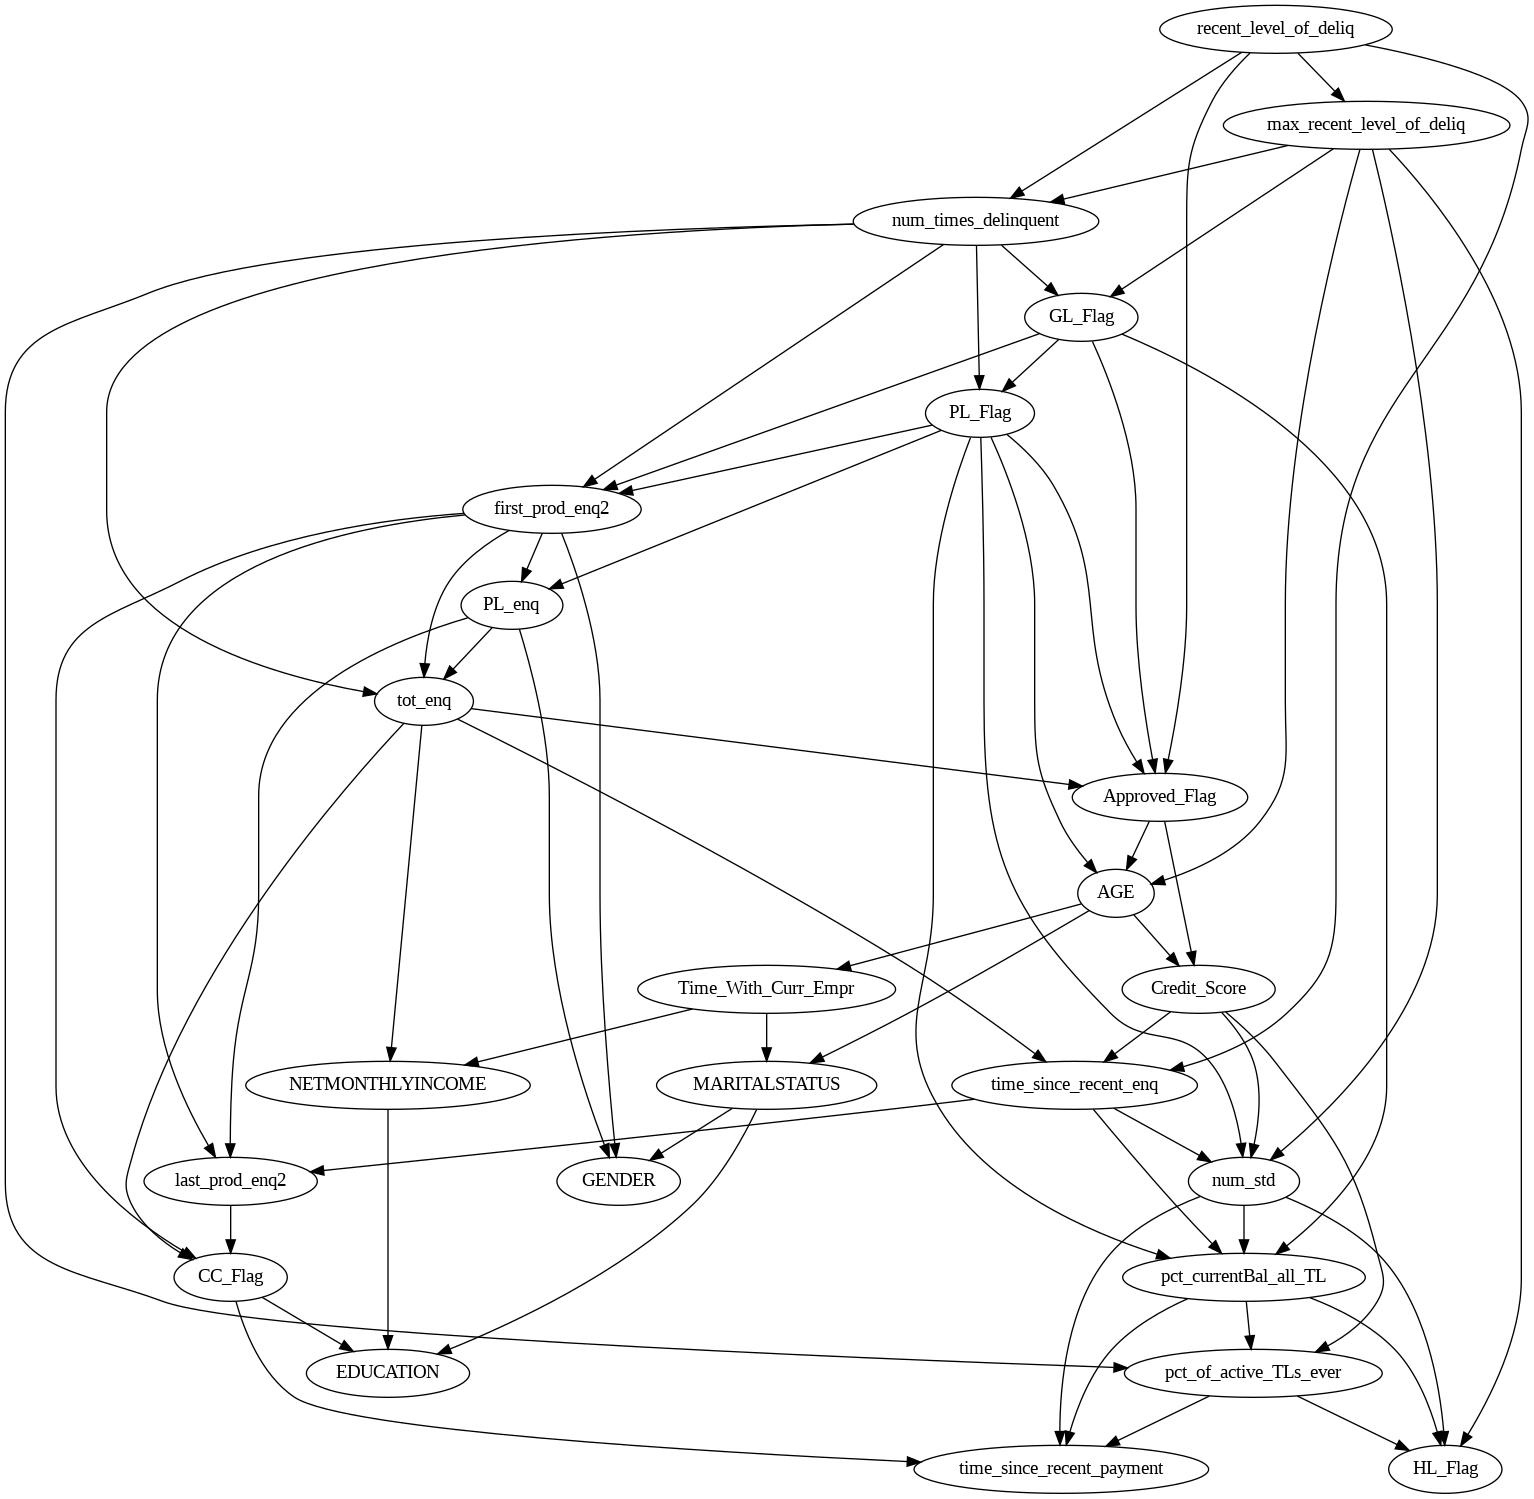

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork

# Measure execution time for learning the structure
start_time = time.time()

# Initialize HillClimbSearch with your data
hc = HillClimbSearch(df)

# Define scoring method for hill climbing (BIC in this case)
scoring_method = BicScore(df)

# Learn the model structure
model_structure = hc.estimate(scoring_method=scoring_method)

# Create Bayesian Network with learned structure
bayesian_model = BayesianNetwork(model_structure.edges())

# Calculate execution time
execution_time = time.time() - start_time

# Calculate BIC score
bic_score = scoring_method.score(bayesian_model)

# Print Execution Time and BIC Score
print("Execution Time:", execution_time)
print("BIC Score:", bic_score)

exec_HC = execution_time
bic_HC = bic_score


import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork

from IPython.display import Image

display(Image((nx.drawing.nx_pydot.to_pydot(bayesian_model)).create_png()))

Big Brave Algo with K2 score

In [ ]:
import bamt.networks as networks
from pgmpy.estimators import K2Score, BicScore
from pgmpy.models import BayesianNetwork
from time import time

# Step 1: Build the Bayesian network with bamt
start_time_bigbrave = time()
bn2 = networks.DiscreteBN()
bn2.add_nodes(descriptor=info)
params = {'white_list': ps}
bn2.add_edges(discretized_data, scoring_function=('K2', K2Score), params=params)
end_time_bigbrave = time() - start_time_bigbrave
print("Execution time:", end_time_bigbrave)

# Step 2: Convert to pgmpy BayesianNetwork format
pgmpy_model2 = BayesianNetwork(bn2.edges)


# Step 4: Compute the BIC score
bic_score = BicScore(processed_data)
final_bic_score = bic_score.score(pgmpy_model2)

# Store execution time and BIC score in variables
exec_bigBraveK2 = end_time_bigbrave
bic_bigBraveK2 = final_bic_score

print(f"Execution time: {exec_bigBraveK2}")
print(f"Final BIC score for the model: {final_bic_score}")


  0%|          | 0/1000000 [00:00<?, ?it/s]

Execution time: 6.889928579330444
Execution time: 6.889928579330444
Final BIC score for the model: -335743120.37205094


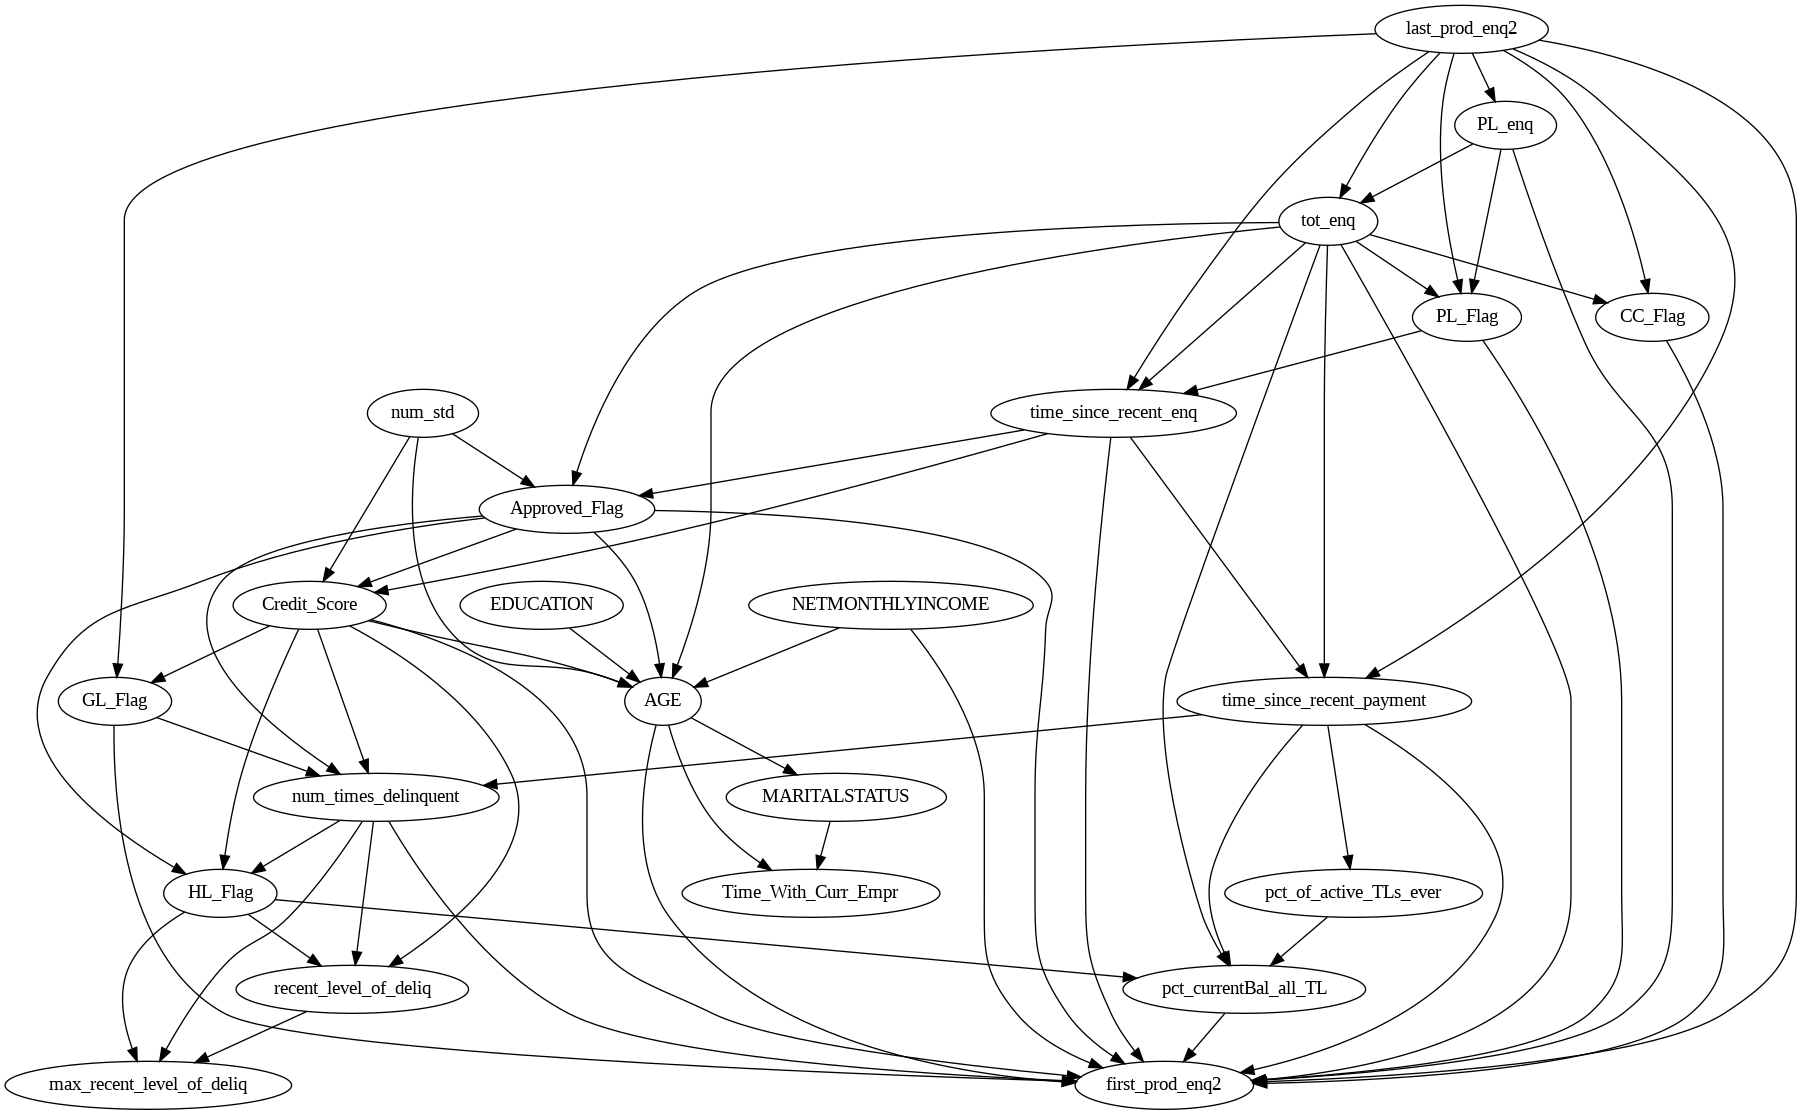

In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 8))
# G = nx.DiGraph(bn.edges)
# pos = nx.spring_layout(G, seed=42)  # Spring layout for clear visualization
# nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray", arrows=True, arrowsize=20)
# plt.title("BigBraveBN with K2")
# plt.show()

import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianNetwork

from IPython.display import Image

display(Image((nx.drawing.nx_pydot.to_pydot(pgmpy_model2)).create_png()))

BIC Score and Execution Time

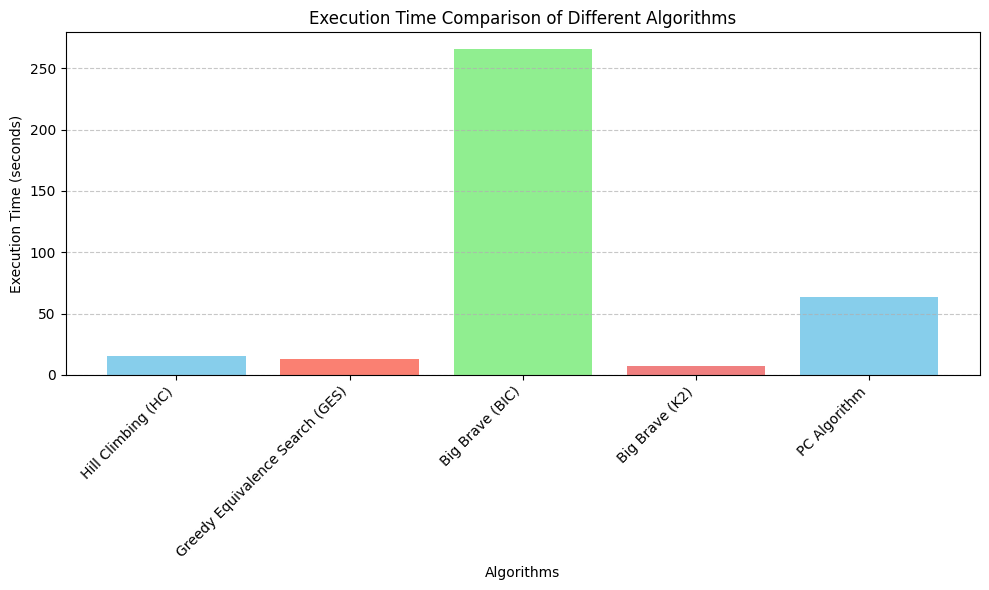

In [ ]:
import matplotlib.pyplot as plt
algorithms = ['Hill Climbing (HC)', 'Greedy Equivalence Search (GES)', 'Big Brave (BIC)', 'Big Brave (K2)', 'PC Algorithm']
execution_times = [exec_HC, exec_GES, exec_bigBraveBIC, exec_bigBraveK2, exec_PC]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(algorithms, execution_times, color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])
plt.xlabel("Algorithms")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time Comparison of Different Algorithms")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

[-807812.1749222757, -807914.9837129056, -883980.9833572818, -335743120.37205094, -494181.3688670925]


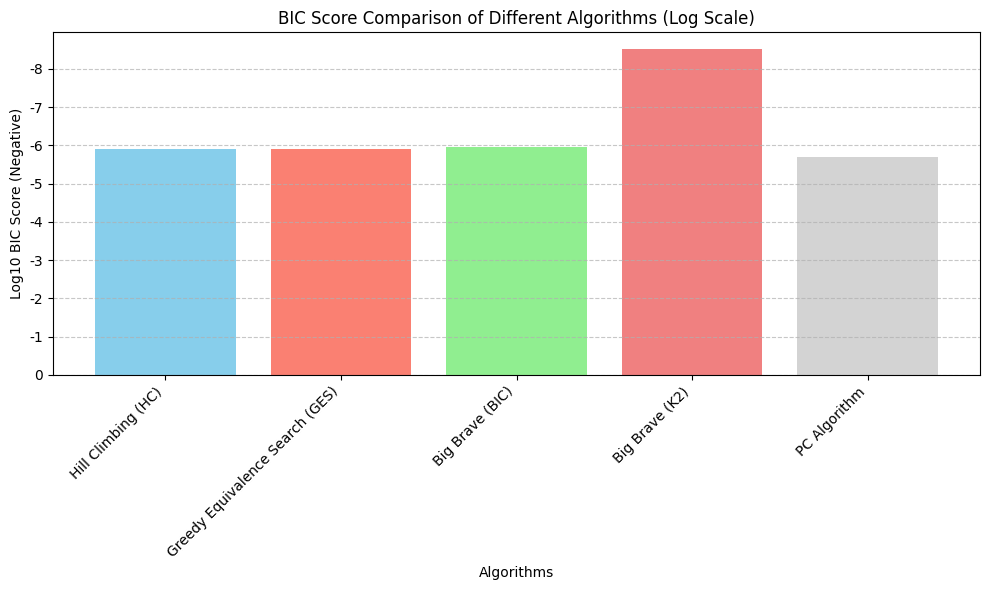

In [ ]:
algorithms = ['Hill Climbing (HC)', 'Greedy Equivalence Search (GES)', 'Big Brave (BIC)', 'Big Brave (K2)', 'PC Algorithm']
bic_scores = [bic_HC, bic_GES, bic_bigBraveBIC, bic_bigBraveK2, bic_PC]

print(bic_scores)
# Plotting the graph
# plt.figure(figsize=(10, 6))
# plt.bar(algorithms, bic_scores, color=['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightgrey'])
# plt.xlabel("Algorithms")
# plt.ylabel("BIC Score")
# plt.title("BIC Score Comparison of Different Algorithms")
# plt.xticks(rotation=45, ha="right")
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Show the plot
# plt.tight_layout()
# plt.show()
import matplotlib.pyplot as plt
import numpy as np



# Compute the log10 of the absolute values
log_bic_scores = [np.log10(abs(score)) for score in bic_scores]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(algorithms, log_bic_scores, color=['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightgrey'])
plt.xlabel("Algorithms")
plt.ylabel("Log10 BIC Score (Negative)")
plt.title("BIC Score Comparison of Different Algorithms (Log Scale)")
plt.xticks(rotation=45, ha="right")

# Customize the y-axis to display negative values
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([-int(tick) for tick in y_ticks])  # Display as negative values

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Confusion Matrix

In [ ]:
# # make the approved flag var in the data to be discrete
# after_df = pd.read_csv('/content/After.csv')

# # print the df:
# print(after_df.head())
after_df

,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_std,num_sub,num_dbt,num_lss,recent_level_of_deliq,tot_enq,CC_enq,...,pct_of_active_TLs_ever,pct_currentBal_all_TL,CC_Flag,PL_Flag,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,549.0,11,29,21,0,0,0,29,6.0,0.0,...,0.200,0.798,0,1,1,0,PL,PL,696,P2
1,47.0,0,0,0,0,0,0,0,1.0,0.0,...,1.000,0.370,0,0,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,302.0,9,25,10,0,0,0,25,4.0,0.0,...,1.000,0.585,0,0,1,0,ConsumerLoan,others,693,P2
4,583.0,0,0,53,0,0,0,0,1.0,0.0,...,0.333,0.000,0,0,0,0,AL,AL,753,P1
5,245.0,14,270,5,3,0,0,26,15.0,2.0,...,0.167,0.000,0,0,1,0,ConsumerLoan,PL,668,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,2,24,0,0,0,0,24,4.0,0.0,...,1.000,0.230,0,0,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,57.0,0,0,6,0,0,0,0,2.0,0.0,...,0.500,0.660,0,0,0,0,others,others,702,P1
51333,32.0,0,0,0,0,0,0,0,6.0,0.0,...,0.500,0.428,0,0,0,0,ConsumerLoan,others,661,P3
51334,58.0,0,0,0,0,0,0,0,3.0,0.0,...,0.500,0.143,0,0,0,0,ConsumerLoan,others,686,P2


In [ ]:
# Custom priority mapping for 'Approved_Flag' before normalization
priority_mapping = {
    'P1': 1.0,       # Highest priority
    'P2': 0.666667,
    'P3': 0.333333,
    'P4': 0.0        # Lowest priority
}

# update: converting this to discrete values to maintain order


after_df['Approved_Flag'] = after_df['Approved_Flag'].map(priority_mapping)

# Encode the other categorical columns as numerical codes
categorical_columns = after_df.select_dtypes(include=['object', 'string']).columns
for col in categorical_columns:
    if col != 'Approved_Flag':
        after_df[col] = pd.Categorical(after_df[col]).codes



In [ ]:
def map_approved_flag(value):
    rounded_value = round(value, 6)

    mapping = {
        0.0: 3,
        0.333333: 2,
        0.666667: 1,
        1.0: 0
    }

    return mapping.get(rounded_value, None)

after_df['Approved_Flag'] = after_df['Approved_Flag'].apply(map_approved_flag)

nan_count = after_df['Approved_Flag'].isna().sum()
if nan_count > 0:
    print(f"Warning: {nan_count} values in 'Approved_Flag' could not be mapped and are set to NaN.")

print(after_df['Approved_Flag'])

0        1
1        1
2        1
4        0
5        2
        ..
51331    3
51332    0
51333    2
51334    1
51335    1
Name: Approved_Flag, Length: 42066, dtype: int64


In [ ]:
columns_to_process = [
    'time_since_recent_payment',
    'num_times_delinquent',
    'max_recent_level_of_deliq',
    'num_std',
    'num_sub',
    'num_dbt',
    'num_lss',
    'recent_level_of_deliq',
    'tot_enq',
    'CC_enq',
    'PL_enq',
    'time_since_recent_enq',
    'AGE',
    'NETMONTHLYINCOME',
    'Time_With_Curr_Empr',
    'pct_of_active_TLs_ever',
    'pct_currentBal_all_TL',
    'Credit_Score'
]

for col in columns_to_process:
    quartiles, bins = pd.qcut(
        after_df[col],
        q=4,
        labels=False,  # This will return 0, 1, 2, 3 (instead of 1, 2, 3, 4)
        retbins=True,  # This returns the bin edges as well
        duplicates='drop'
    )

    # Assign quartiles back to the DataFrame
    after_df[col] = quartiles + 1  # Shift to 1, 2, 3, 4 instead of 0, 1, 2, 3

    # Display the counts of each quartile
    print(after_df[col].value_counts())



time_since_recent_payment
1    10939
3    10512
4    10488
2    10127
Name: count, dtype: int64
num_times_delinquent
1    32160
2     9906
Name: count, dtype: int64
max_recent_level_of_deliq
1    31578
2    10488
Name: count, dtype: int64
num_std
1    31726
2    10340
Name: count, dtype: int64
num_sub
1    42066
Name: count, dtype: int64
num_dbt
1    42066
Name: count, dtype: int64
num_lss
1    42066
Name: count, dtype: int64
recent_level_of_deliq
1    31834
2    10232
Name: count, dtype: int64
tot_enq
1    15465
3    11971
4     8937
2     5693
Name: count, dtype: int64
CC_enq
1    42066
Name: count, dtype: int64
PL_enq
1    31884
2    10182
Name: count, dtype: int64
time_since_recent_enq
1    11007
3    10527
4    10498
2    10034
Name: count, dtype: int64
AGE
1    11884
4    10219
2    10026
3     9937
Name: count, dtype: int64
NETMONTHLYINCOME
1    12226
4    10486
3    10311
2     9043
Name: count, dtype: int64
Time_With_Curr_Empr
1    10735
3    10723
2    10338
4    10270
Name: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from sklearn.metrics import confusion_matrix

In [ ]:
# after_df = pd.read_csv('/content/After.csv')
# print(after_df.head())

In [ ]:
models_comparison = {}  # to compare various models

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

def generate_confusion_matrix(edges, X_train, X_test, y_train, y_test, model_name):
    """
    Generate confusion matrix for Bayesian Network model, using only features present in the edge list

    Parameters:
    -----------
    edges : list of tuples
        The edges defining the Bayesian Network structure
    X_train : pandas DataFrame
        Training features
    X_test : pandas DataFrame
        Test features
    y_train : pandas Series
        Training target variable
    y_test : pandas Series
        Test target variable

    Returns:
    --------
    pandas DataFrame
        Confusion matrix as a DataFrame
    """
    # Get all unique nodes from edges
    nodes = set()
    for edge in edges:
        nodes.add(edge[0])
        nodes.add(edge[1])

    # Add Approved_Flag if not in nodes
    nodes.add('Approved_Flag')

    # Filter features to only include those present in the edge list
    valid_features = [col for col in X_train.columns if col in nodes]

    # Create filtered training DataFrame
    train_df = X_train[valid_features].copy()

    # Convert target variables to integer type and ensure they're discrete
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    train_df['Approved_Flag'] = y_train

    # Create filtered test DataFrame
    test_df = X_test[valid_features].copy()
    test_df['Approved_Flag'] = y_test

    print(f"Using features: {valid_features}")
    print(f"Unique classes in training data: {sorted(y_train.unique())}")

    # Create and fit the model
    model = BayesianModel(edges)
    model.fit(df, estimator=MaximumLikelihoodEstimator)

    # Create inference engine
    infer = VariableElimination(model)

    # Get predictions
    y_pred = []
    errors = 0

    for index, row in test_df[valid_features].iterrows():
        evidence = row.to_dict()
        try:
            query_result = infer.query(variables=['Approved_Flag'], evidence=evidence)
            # Convert prediction to integer
            predicted_class = int(query_result.values.argmax())
            y_pred.append(predicted_class)
        except Exception as e:
            errors += 1
            if errors <= 5:  # Only print first 5 errors
                print(f"Error in prediction for row {index}: {e}")
            # Fallback to most common class in training data
            y_pred.append(int(y_train.mode()[0]))

    if errors > 0:
        print(f"\nTotal prediction errors encountered: {errors}")

    # Convert predictions to numpy array and ensure integer type
    y_pred = np.array(y_pred, dtype=int)
    y_test = np.array(y_test, dtype=int)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Get unique classes to determine matrix size
    unique_classes = sorted(set(np.unique(y_test)) | set(np.unique(y_pred)))
    n_classes = len(unique_classes)

    # Create labels for rows and columns
    labels = [f'True {i}' for i in range(n_classes)]
    pred_labels = [f'Pred {i}' for i in range(n_classes)]

    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    print(f"\nF1 Score: {f1:.4f}")
    # Calculate accuracy
    accuracy = sum(y_pred == y_test) / len(y_test)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    result_df = pd.DataFrame(
        conf_matrix,
        index=labels,
        columns=pred_labels
    )

    print(f"\nModel Accuracy: {accuracy:.4f}")
    print(f"\nF1 Score: {f1:.4f}")
    print(f"\nPrecision: {precision:.4f}")
    print(f"\nRecall: {recall:.4f}")

    metrics = {
        "model_name": model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1":f1
    }


    # print("CPDs")
    # relavant_colums = ['Credit_Score', 'Approved_Flag', 'num_times_delinquent', 'time_since_recent_payment','recent_level_of_deliq']

    # if model_name == 'BigBrave':
    #   for col in relavant_colums:
    #     print(col)
    #     print(model.get_cpds(col))

    query_result = infer.query(variables=['Approved_Flag'], evidence={'Credit_Score': 3, 'num_times_delinquent': 1, 'HL_Flag':1})

    print(query_result)


    return result_df, metrics

In [ ]:
X = after_df.drop('Approved_Flag', axis=1)
y = after_df['Approved_Flag']

print(X.head())
print(y.head())
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

   time_since_recent_payment  num_times_delinquent  max_recent_level_of_deliq  \
0                          4                     2                          2   
1                          1                     1                          1   
2                          4                     2                          2   
4                          4                     1                          1   
5                          4                     2                          2   

   num_std  num_sub  num_dbt  num_lss  recent_level_of_deliq  tot_enq  CC_enq  \
0        2        1        1        1                      2        3       1   
1        1        1        1        1                      1        1       1   
2        2        1        1        1                      2        3       1   
4        2        1        1        1                      1        1       1   
5        1        1        1        1                      2        4       1   

   ...  Time_With_Curr_Emp

In [ ]:
hc_edges = list(model_structure.edges())
print("Hill Climbing Edges:", hc_edges)

ges_edges = list(best_model_ges.edges())
print("GES Edges:", ges_edges)

big_brave_edges = list(bn.edges)
print("BigBrave Edges:", big_brave_edges)

big_brave_k2_edges = list(bn2.edges)
print("BigBraveK2 Edges:", big_brave_k2_edges)

pc_edges = list(pc_model.edges())
print("BigBraveK2 Edges:", pc_edges)

Hill Climbing Edges: [('num_times_delinquent', 'tot_enq'), ('num_times_delinquent', 'pct_of_active_TLs_ever'), ('num_times_delinquent', 'first_prod_enq2'), ('num_times_delinquent', 'PL_Flag'), ('num_times_delinquent', 'GL_Flag'), ('max_recent_level_of_deliq', 'num_times_delinquent'), ('max_recent_level_of_deliq', 'num_std'), ('max_recent_level_of_deliq', 'HL_Flag'), ('max_recent_level_of_deliq', 'AGE'), ('max_recent_level_of_deliq', 'GL_Flag'), ('num_std', 'HL_Flag'), ('num_std', 'pct_currentBal_all_TL'), ('num_std', 'time_since_recent_payment'), ('recent_level_of_deliq', 'max_recent_level_of_deliq'), ('recent_level_of_deliq', 'Approved_Flag'), ('recent_level_of_deliq', 'num_times_delinquent'), ('recent_level_of_deliq', 'time_since_recent_enq'), ('tot_enq', 'time_since_recent_enq'), ('tot_enq', 'Approved_Flag'), ('tot_enq', 'CC_Flag'), ('tot_enq', 'NETMONTHLYINCOME'), ('PL_enq', 'tot_enq'), ('PL_enq', 'last_prod_enq2'), ('PL_enq', 'GENDER'), ('time_since_recent_enq', 'last_prod_enq2'),

In [ ]:
after_df
# print("Unique values in 'Approved_Flag' before mapping:", after_df['Approved_Flag'].unique())

,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_std,num_sub,num_dbt,num_lss,recent_level_of_deliq,tot_enq,CC_enq,...,pct_of_active_TLs_ever,pct_currentBal_all_TL,CC_Flag,PL_Flag,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,4,2,2,2,1,1,1,2,3,1,...,1,3,0,1,1,0,4,4,4,1
1,1,1,1,1,1,1,1,1,1,1,...,3,2,0,0,0,0,2,2,3,1
2,4,2,2,2,1,1,1,2,3,1,...,3,2,0,0,1,0,2,5,4,1
4,4,1,1,2,1,1,1,1,1,1,...,2,1,0,0,0,0,0,0,4,0
5,4,2,2,1,1,1,1,2,4,1,...,1,1,0,0,1,0,2,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,1,2,2,1,1,1,1,2,3,1,...,3,2,0,0,0,0,2,2,1,3
51332,2,1,1,1,1,1,1,1,1,1,...,2,3,0,0,0,0,5,5,4,0
51333,1,1,1,1,1,1,1,1,3,1,...,2,2,0,0,0,0,2,5,1,2
51334,2,1,1,1,1,1,1,1,2,1,...,2,1,0,0,0,0,2,5,3,1


In [ ]:
hc_confusion_matrix, hc_metrics = generate_confusion_matrix(hc_edges, X_train, X_test, y_train, y_test, "HC")
print("Hill Climbing Confusion Matrix:")
print(hc_confusion_matrix)
models_comparison["HC"] = hc_metrics

Using features: ['time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_std', 'recent_level_of_deliq', 'tot_enq', 'PL_enq', 'time_since_recent_enq', 'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_of_active_TLs_ever', 'pct_currentBal_all_TL', 'CC_Flag', 'PL_Flag', 'HL_Flag', 'GL_Flag', 'last_prod_enq2', 'first_prod_enq2', 'Credit_Score']
Unique classes in training data: [0, 1, 2, 3]

F1 Score: 0.8044

Model Accuracy: 0.8068

F1 Score: 0.8044

Precision: 0.8025

Recall: 0.8068
CPDs
Hill Climbing Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3
True 0     284     216       0       0
True 1     176    2382       0       0
True 2      21      30     397     183
True 3       0       0     187     331


In [ ]:
ges_confusion_matrix, ges_metrics = generate_confusion_matrix(ges_edges, X_train, X_test, y_train, y_test, "GES")
print("\nGES Confusion Matrix:")
print(ges_confusion_matrix)
models_comparison["GES"] = ges_metrics

Using features: ['time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_std', 'recent_level_of_deliq', 'tot_enq', 'PL_enq', 'time_since_recent_enq', 'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_of_active_TLs_ever', 'pct_currentBal_all_TL', 'CC_Flag', 'PL_Flag', 'HL_Flag', 'GL_Flag', 'last_prod_enq2', 'first_prod_enq2', 'Credit_Score']
Unique classes in training data: [0, 1, 2, 3]

F1 Score: 0.8013

Model Accuracy: 0.8051

F1 Score: 0.8013

Precision: 0.7985

Recall: 0.8051
CPDs

GES Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3
True 0     265     235       0       0
True 1     165    2393       0       0
True 2      20      31     407     173
True 3       0       0     196     322


In [ ]:
big_brave_k2_confusion_matrix, big_brave_metrics = generate_confusion_matrix(big_brave_k2_edges, X_train, X_test, y_train, y_test, "BigBrave")
print("\nBigBraveK2 Confusion Matrix:")
print(big_brave_k2_confusion_matrix)
models_comparison["BigBrave"] = big_brave_metrics

Using features: ['time_since_recent_payment', 'num_times_delinquent', 'max_recent_level_of_deliq', 'num_std', 'recent_level_of_deliq', 'tot_enq', 'PL_enq', 'time_since_recent_enq', 'MARITALSTATUS', 'EDUCATION', 'AGE', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_of_active_TLs_ever', 'pct_currentBal_all_TL', 'CC_Flag', 'PL_Flag', 'HL_Flag', 'GL_Flag', 'last_prod_enq2', 'first_prod_enq2', 'Credit_Score']
Unique classes in training data: [0, 1, 2, 3]

F1 Score: 0.9550

Model Accuracy: 0.9553

F1 Score: 0.9550

Precision: 0.9550

Recall: 0.9553
+------------------+----------------------+
| Approved_Flag    |   phi(Approved_Flag) |
+==================+======================+
| Approved_Flag(1) |               0.0000 |
+------------------+----------------------+
| Approved_Flag(2) |               1.0000 |
+------------------+----------------------+
| Approved_Flag(3) |               0.0000 |
+------------------+----------------------+
| Approved_Flag(4) |               0.0000 |
+---------

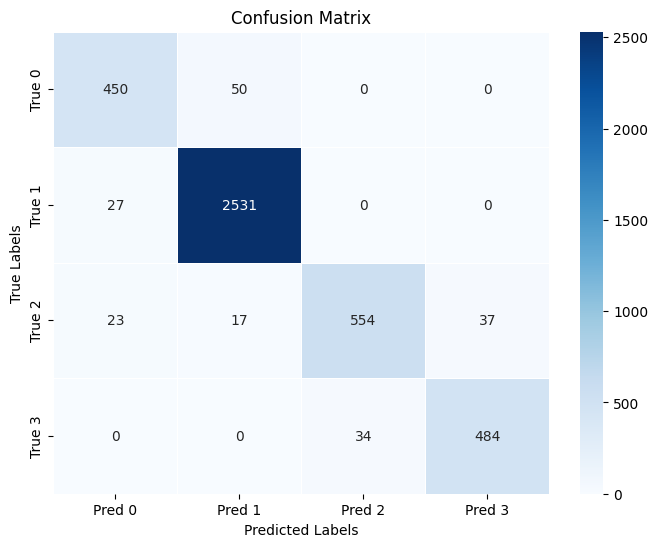

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(
    big_brave_k2_confusion_matrix,
    annot=True,         # Show counts in cells
    fmt="d",            # Integer format for counts
    cmap="Blues",       # Color map
    linewidths=0.5,     # Line width between cells
    cbar=True           # Show color bar on the side
)

    # Add titles and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
pc_confusion_matrix, pc_metrics = generate_confusion_matrix(pc_edges, X_train, X_test, y_train, y_test, "PC")
print("\nBigBraveK2 Confusion Matrix:")
print(pc_confusion_matrix)

models_comparison["PC"] = pc_metrics

Using features: ['num_times_delinquent', 'max_recent_level_of_deliq', 'num_std', 'recent_level_of_deliq', 'tot_enq', 'PL_enq', 'time_since_recent_enq', 'MARITALSTATUS', 'AGE', 'Time_With_Curr_Empr', 'pct_of_active_TLs_ever', 'GL_Flag', 'last_prod_enq2', 'Credit_Score']
Unique classes in training data: [0, 1, 2, 3]

F1 Score: 0.7241

Model Accuracy: 0.7694

F1 Score: 0.7241

Precision: 0.6956

Recall: 0.7694
CPDs

BigBraveK2 Confusion Matrix:
        Pred 0  Pred 1  Pred 2  Pred 3
True 0     260     240       0       0
True 1     161    2397       0       0
True 2      20      31     580       0
True 3       0       0     518       0



Model Accuracy: 0.8201

F1 Score: 0.8175

Precision: 0.8161

Recall: 0.8201
Confusion Matrix:
[[ 305  195    0    0]
 [ 151 2407    0    0]
 [  19   32  388  192]
 [   0    0  168  350]]


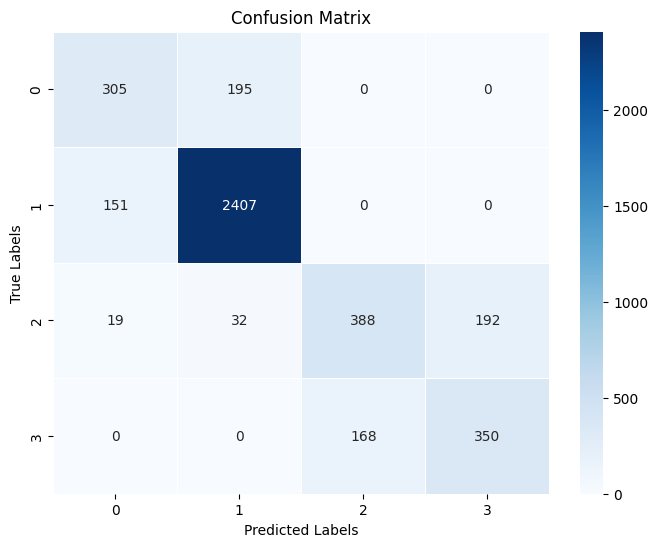

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import pandas as pd

# Initialize the Support Vector Machine Classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can change kernel to 'rbf', 'poly', etc.

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model



# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = sum(y_pred == y_test) / len(y_test)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
# Print results

print(f"\nModel Accuracy: {accuracy:.4f}")
print(f"\nF1 Score: {f1:.4f}")
print(f"\nPrecision: {precision:.4f}")
print(f"\nRecall: {recall:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

models_comparison["SVM"] = {
    "model_name": "SVM",
    "accuracy": accuracy,
    "f1": f1,
    "recall": recall,
    "precision": precision
}

plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(
    conf_matrix,
    annot=True,         # Show counts in cells
    fmt="d",            # Integer format for counts
    cmap="Blues",       # Color map
    linewidths=0.5,     # Line width between cells
    cbar=True           # Show color bar on the side
)

    # Add titles and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Model Accuracy: 0.7811

F1 Score: 0.7795

Precision: 0.7784

Recall: 0.7811
Confusion Matrix:
[[ 259  208   33    0]
 [ 175 2355   28    0]
 [  16   29  366  220]
 [   0    0  212  306]]


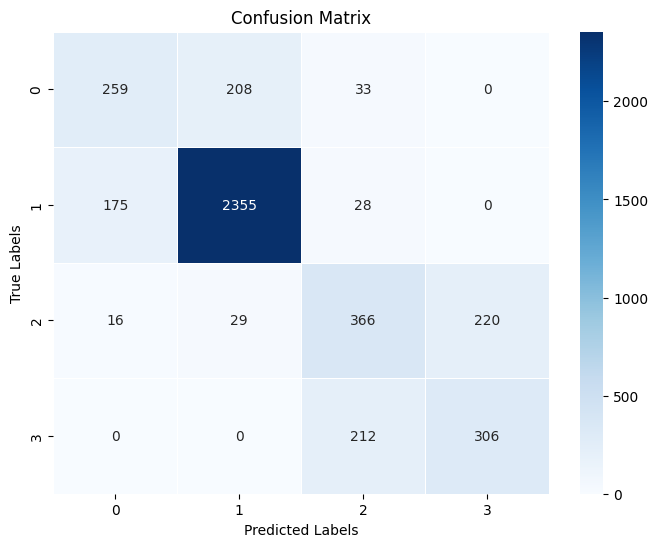

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy = sum(y_pred == y_test) / len(y_test)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print results
print(f"\nModel Accuracy: {accuracy:.4f}")
print(f"\nF1 Score: {f1:.4f}")
print(f"\nPrecision: {precision:.4f}")
print(f"\nRecall: {recall:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

models_comparison["DecisionTree"] = {
    "model_name": "DecisionTree",
    "accuracy": accuracy,
    "f1": f1,
    "recall": recall,
    "precision": precision
}

plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(
    conf_matrix,
    annot=True,         # Show counts in cells
    fmt="d",            # Integer format for counts
    cmap="Blues",       # Color map
    linewidths=0.5,     # Line width between cells
    cbar=True           # Show color bar on the side
)

    # Add titles and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
models_comparison

{'HC': {'model_name': 'HC',
  'accuracy': 0.8067506536724507,
  'precision': 0.8025426728276575,
  'recall': 0.8067506536724507,
  'f1': 0.8043709792049969},
 'GES': {'model_name': 'GES',
  'accuracy': 0.8050867601616354,
  'precision': 0.7985283332931221,
  'recall': 0.8050867601616354,
  'f1': 0.8013228827697814},
 'BigBrave': {'model_name': 'BigBrave',
  'accuracy': 0.9553125742809603,
  'precision': 0.9550174043275882,
  'recall': 0.9553125742809603,
  'f1': 0.9549582538363548},
 'PC': {'model_name': 'PC',
  'accuracy': 0.7694318992155931,
  'precision': 0.6955723466399436,
  'recall': 0.7694318992155931,
  'f1': 0.7240768428056178},
 'SVM': {'model_name': 'SVM',
  'accuracy': 0.8200618017589731,
  'f1': 0.8174894542364736,
  'recall': 0.8200618017589731,
  'precision': 0.8161260614067734},
 'DecisionTree': {'model_name': 'DecisionTree',
  'accuracy': 0.7810791537913002,
  'f1': 0.7795183424612797,
  'recall': 0.7810791537913002,
  'precision': 0.7783813696349473}}

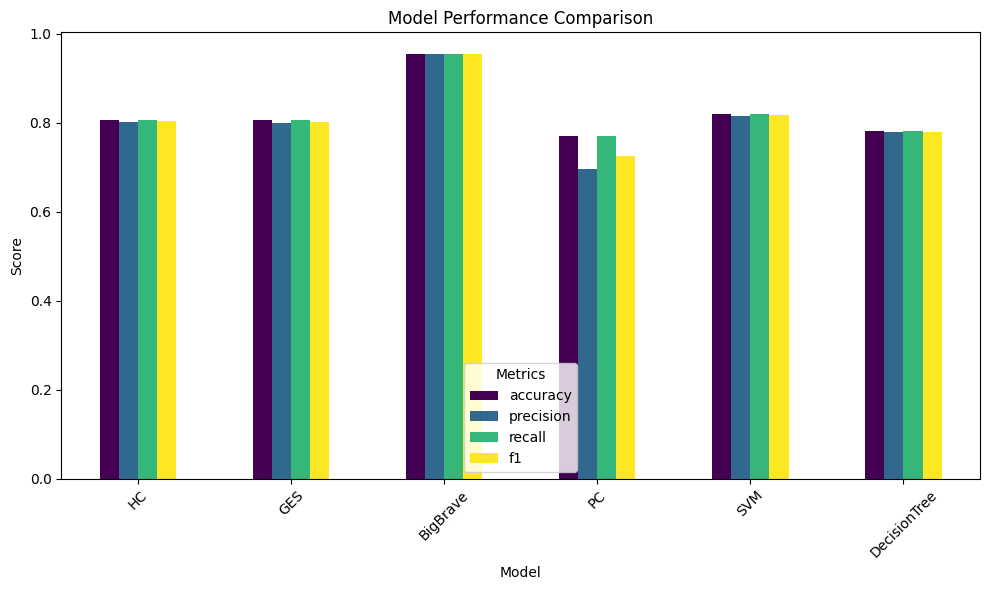

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
models_comparison_df = pd.DataFrame(models_comparison).T  # Transpose to have models as rows
models_comparison_df.reset_index(inplace=True)
models_comparison_df.rename(columns={'index': 'Model'}, inplace=True)

# Define metrics
metrics = ['accuracy', 'precision', 'recall', 'f1']
ax = models_comparison_df.set_index('Model')[metrics].plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metrics")

plt.tight_layout()
plt.show()
